In [1]:
import jutil
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
sql = "select cr.advice1,tr.course_name,cr.student_id from teach_record tr \
join appraise_course_record cr on tr.course_code=cr.course_code and tr.term_id=cr.term_id \
where course_name='高级语言程序设计' and teacher_name='陈帆'"

df = jutil.load_pd_df(sql)

In [37]:
df.count()

advice1        261
course_name    261
student_id     261
dtype: int64

In [38]:
df.head()

,advice1,course_name,student_id
0,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbs...,算法设计与分析,20122609
1,老师尽职尽责，很令人感动。,算法设计与分析,20132211
2,好,算法设计与分析,20132152
3,好,算法设计与分析,20132152
4,很好很好很好很好很好,算法设计与分析,20132248


In [25]:
def keep_hanzi(text):
    s = [ char for char in text if '\u4e00' <= char <= '\u9fff']
    return str(s)

In [30]:
def teacher_cloud(df):
    words = set(df['advice1'])
    txt = str(words).replace('nbsp','')
#     txt = keep_hanzi(txt)
#     print(txt)
    wd = WordCloud(font_path="SimHei.ttf",max_font_size=40).generate(txt)

    plt.imshow(wd, interpolation='bilinear')
    plt.axis("off")
    plt.show()

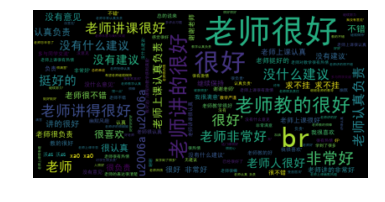

In [41]:
teacher_cloud(df)

In [22]:
sql = "select teacher_name,teacher_appraise,best_course_appraise as best,worst_course_appraise as worst \
from appraise_term_record where teacher_name='朱'"
df = jutil.load_pd_df(sql)
df.head()

""


In [23]:
df.empty

True

In [9]:
words = str(set(df['best']) | set(df['teacher_appraise'])).replace('nbsp','')

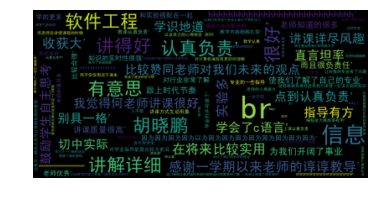

In [13]:
wd = WordCloud(font_path="SimHei.ttf",max_font_size=40).generate(words)

plt.imshow(wd, interpolation='bilinear')
plt.axis("off")
plt.show()

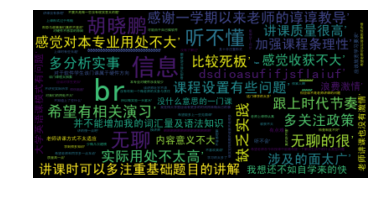

In [14]:
#  差的情况

bads = str(set(df['worst'])).replace('nbsp','')
wd = WordCloud(font_path="SimHei.ttf",max_font_size=40).generate(bads)

plt.imshow(wd, interpolation='bilinear')
plt.axis("off")
plt.show()